# Machine Learning Algorithms for Audio Classification

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

In [8]:
audio_data = np.load("audio_data.npy")
labels = np.load("wav_labels.npy")

# labels: modality-vocal channel-emotion-emotional intensity-statement-repetition-actor
# emotions: 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
# odd number actors = male, even = female

# 1440 files: 24 speakers, 60 recordings per speaker
# alternate male/female so can accurately label gender of speaker with if statement below
audio_data = audio_data.reshape(1440, 9480)

features = []

for i in range(1440):
    
    if (labels[i][6]%2 == 0):
        label = "Female"
    else:
        label = "Male"
        
    if (labels[i][2] == 1):
        emot = "neutral"
    elif (labels[i][2] == 2):
        emot = "calm"
    elif (labels[i][2] == 3):
        emot = "happy"
    elif (labels[i][2] == 4):
        emot = "sad"
    elif (labels[i][2] == 5):
        emot = "angry"
    elif (labels[i][2] == 6):
        emot = "fearful"
    elif (labels[i][2] == 7):
        emot = "disgust"
    elif (labels[i][2] == 8):
        emot = "surprised"
    
    features.append([audio_data[i], label, emot])


    
feature_df = pd.DataFrame(features, columns = ["mfcc", "gender", "emotion"])

feature_df.head()

,mfcc,gender,emotion
0,"[-855.3770751953125, -855.3770751953125, -855....",Male,neutral
1,"[-850.3917236328125, -850.435791015625, -850.4...",Male,neutral
2,"[-849.78369140625, -848.8447265625, -848.56610...",Male,neutral
3,"[-842.9385375976562, -843.2474975585938, -850....",Male,neutral
4,"[-911.1758422851562, -910.4053344726562, -905....",Male,calm


In [12]:
# pca = sk.decomposition.PCA(n_components= ).fit_transform(feature_df)

X = np.array(feature_df.mfcc.tolist())

Y = np.array(feature_df.gender.tolist())

Y1 = np.array(feature_df.emotion.tolist())

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)

rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

predictions = rfc.predict(x_test)

   Male  Female
0   177       6
1     4     173


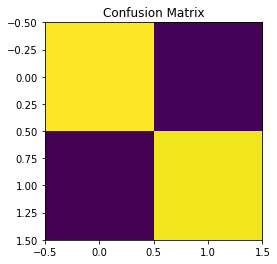

In [13]:
cm = sk.metrics.confusion_matrix(y_test, predictions)

df = pd.DataFrame(cm, columns=[Y[0], Y[60]])
print(df)

plt.figure(figsize=(10,4))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.show()

In [14]:
def precision(confmatrix):
    # precision = tp/(tp+fp)
    tp = np.diag(cm)
    fp = np.sum(cm, axis=0) - tp
    precision = np.mean(tp/(tp+fp))
    return precision

prec_out = precision(cm)

print("Precision: " + str(prec_out))
cr = sk.metrics.classification_report(y_test, predictions)
print(cr)

Precision: 0.9721904997067811
              precision    recall  f1-score   support

      Female       0.98      0.97      0.97       183
        Male       0.97      0.98      0.97       177

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

